<a href="https://colab.research.google.com/github/Jihaan-Jain/Cat-And-Dog-classification/blob/main/CATvsDOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

📄 Zip File Handling (Pointwise Notes)
import zipfile
➔ Imports the built-in zipfile module in Python.
➔ Helps in creating, reading, writing, and extracting .zip files.

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
➔ Opens the zip file located at /content/dogs-vs-cats.zip in read mode ('r').
➔ zip_ref acts as a controller/handler to manage operations on that zip file.

zip_ref.extractall('/content')
➔ Extracts all files and folders inside the zip archive into the /content/ directory.
➔ After extraction, you will see the extracted files/folders in /content/.

zip_ref.close()
➔ Closes the zip file handler.
➔ Important: Frees up system resources and avoids possible file corruption.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',    # Label comes from folder name (e.g., 'cat', 'dog')
    label_mode='int',      # Labels are integers like 0, 1, 2, etc.
    batch_size=32,        # 32 images per batch
    image_size=(256,256)  # Resize all images to 256x256
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


✅ It reads images from /content/train and /content/test.
✅ It infers labels automatically from folder names. (Ex: /cat/, /dog/)
✅ It resizes every image to 256×256 pixels.
✅ It batches them into 32 images per batch.
✅ It returns a TensorFlow Dataset object, ready for training/testing.

In [ ]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image, label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

What happens step-by-step:

1.Function process:

Takes each (image, label) pair.

Divides the pixel values by 255.0 → because image pixel values are originally from 0 to 255 (integers).

After division, pixel values become between 0 and 1 (floats).

tf.cast(..., tf.float32) ensures the new type is float32, which TensorFlow models expect.

➔ Normalization helps the model train faster and better.

2.train_ds.map(process):

Applies the process function to every batch inside train_ds.

Every image inside the batch is normalized.

3.validation_ds.map(process):

Similarly applies it to validation data.

In [ ]:
#create CNN model

model1=Sequential()

model1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Flatten())

model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1,activation='sigmoid'))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model1.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 76ms/step - accuracy: 0.5711 - loss: 2.3580 - val_accuracy: 0.6916 - val_loss: 0.5846
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7069 - loss: 0.5669 - val_accuracy: 0.7154 - val_loss: 0.5367
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.7609 - loss: 0.5076 - val_accuracy: 0.6846 - val_loss: 0.6740
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.7888 - loss: 0.4534 - val_accuracy: 0.7758 - val_loss: 0.5049
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8310 - loss: 0.3885 - val_accuracy: 0.7980 - val_loss: 0.4335
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.8658 - loss: 0.3185 - val_accuracy: 0.7732 - val_loss: 0.6662
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.8945 - loss: 0.2466 - val_accuracy: 0.8140 - val_loss: 0.6514
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 83ms/step - accuracy: 0.9350 - loss: 0.1627 - 

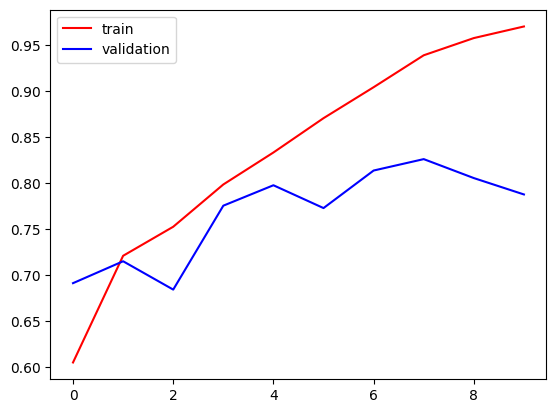

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color= 'red',label='train')
plt.plot(history.history['val_accuracy'],color= 'blue',label='validation')
plt.legend()
plt.show()



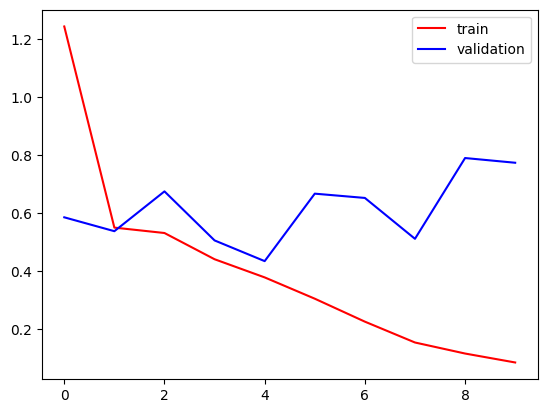

In [ ]:
plt.plot(history.history['loss'],color= 'red',label='train')
plt.plot(history.history['val_loss'],color= 'blue',label='validation')
plt.legend()
plt.show()


In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/cat.jpg')


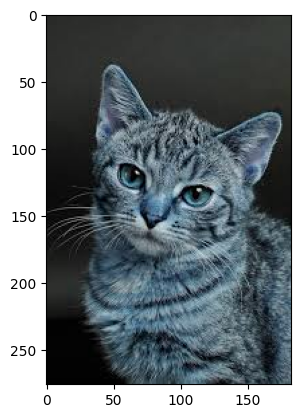

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(276, 183, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model1.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.]], dtype=float32)